# Practice 1. Pandas - NASA Turbofan Jet Engine Data Set

Module: Artificial Intelligence for Aviation Engineering

Instructor: prof. Dmitry Pavlyuk

## pandas

__pandas__ is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

In [4]:
!pip install pandas

In [5]:
import pandas as pd

## Loading / Saving Data

### Loading data to pandas

* from CSV __read_csv__ 
* from XLS, XLSX __read_excel__
* from JSON __read_json__
* from databases __read_sql__
* from HTML __read_html__

Methods work not only for local files, but also accept URLs

# Data Set

CMAPSS Jet Engine Simulated Data

https://data.nasa.gov/Aerospace/CMAPSS-Jet-Engine-Simulated-Data/ff5v-kuh6/about_data


Data sets consists of multiple multivariate time series. Each data set is further divided into training and test subsets. Each time series is from a different engine i.e., the data can be considered to be from a fleet of engines of the same type. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault condition. There are three operational settings that have a substantial effect on engine performance.

# Data Set: downloading

In [6]:
!wget -O CMAPSS.zip "https://data.nasa.gov/download/ff5v-kuh6/application.zip"

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [107]:
!unzip -o CMAPSS.zip -d CMAPSS

Archive:  CMAPSS.zip
  inflating: CMAPSS/Damage Propagation Modeling.pdf  
  inflating: CMAPSS/readme.txt       
  inflating: CMAPSS/RUL_FD001.txt    
  inflating: CMAPSS/RUL_FD002.txt    
  inflating: CMAPSS/RUL_FD003.txt    
  inflating: CMAPSS/RUL_FD004.txt    
  inflating: CMAPSS/test_FD001.txt   
  inflating: CMAPSS/test_FD002.txt   
  inflating: CMAPSS/test_FD003.txt   
  inflating: CMAPSS/test_FD004.txt   
  inflating: CMAPSS/train_FD001.txt  
  inflating: CMAPSS/train_FD002.txt  
  inflating: CMAPSS/train_FD003.txt  
  inflating: CMAPSS/train_FD004.txt  


### Data Set: columns

In [2]:
column_names = ['engine', 'time', 'op_setting_1', 'op_setting_2',
                'op_setting_3'] + [f'sm_{i}' for i in range(1, 22)]
sensor_names={}
dict_list=[ "(Fan inlet temperature) (◦R)","(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]

i=1
for x in dict_list :
    sensor_names[f'sm_{i}']=x
    i+=1
sensor_names

{'sm_1': '(Fan inlet temperature) (◦R)',
 'sm_2': '(LPC outlet temperature) (◦R)',
 'sm_3': '(HPC outlet temperature) (◦R)',
 'sm_4': '(LPT outlet temperature) (◦R)',
 'sm_5': '(Fan inlet Pressure) (psia)',
 'sm_6': '(bypass-duct pressure) (psia)',
 'sm_7': '(HPC outlet pressure) (psia)',
 'sm_8': '(Physical fan speed) (rpm)',
 'sm_9': '(Physical core speed) (rpm)',
 'sm_10': '(Engine pressure ratio(P50/P2)',
 'sm_11': '(HPC outlet Static pressure) (psia)',
 'sm_12': '(Ratio of fuel flow to Ps30) (pps/psia)',
 'sm_13': '(Corrected fan speed) (rpm)',
 'sm_14': '(Corrected core speed) (rpm)',
 'sm_15': '(Bypass Ratio) ',
 'sm_16': '(Burner fuel-air ratio)',
 'sm_17': '(Bleed Enthalpy)',
 'sm_18': '(Required fan speed)',
 'sm_19': '(Required fan conversion speed)',
 'sm_20': '(High-pressure turbines Cool air flow)',
 'sm_21': '(Low-pressure turbines Cool air flow)'}

## Loading data - options

.read_xxx has many parameters (50+) for

* Indexing - get column/row names from the file, arguments you provide, or not at all.
* Type inference and data conversion - including the user-defined value conversions, list of missing value markers, etc.
* Date and time parsing - parsing format, including merging several columns
* Iterating - support for iterating over chunks of very large files.
* Unclean data issues - skipping rows, comments, or other minor things like numeric data with thousands separated by commas
* Dialects (e.g., CSV dialect)

In [3]:
df = pd.read_csv('CMAPSS/train_FD001.txt' , sep = ' ' , header=None, names=column_names, index_col=False )

NameError: name 'pd' is not defined

## Saving data

Very straightforward using __.to_XXX__ methods:
* .to_csv()
* .to_excel()
* .to_sql()
* .to_markdown()

## Pandas Data Structures

### Series and Dataframes

* __Series__
    * 1D array
    * Homogeneous
    * size immutable
* __DataFrame__
    * list of Series
    * 2D array
    * Heterogeneous
    * size mutable

### Bikes dataset: Series

In [59]:
print(type(bikes["casual"]))
bikes["casual"].head()

<class 'pandas.core.series.Series'>


0    3
1    8
2    5
3    3
4    0
Name: casual, dtype: int64

### Bikes dataset: DataFrame

In [60]:
print(type(bikes))
bikes.head()

<class 'pandas.core.frame.DataFrame'>


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Note the index!

## Pandas Data Types

### Python / NumPy / Pandas  Data Types

| Pandas dtype    | Python type  | NumPy type                                                      | Usage                                        |
| --------------- | ------------ | --------------------------------------------------------------- | -------------------------------------------- |
| object          | str or mixed | string\_, unicode\_, mixed types                                | Text or mixed numeric and non-numeric values |
| int64           | int          | int\_, int8, int16, int32, int64, uint8, uint16, uint32, uint64 | Integer numbers                              |
| float64         | float        | float\_, float16, float32, float64                              | Floating point numbers                       |
| bool            | bool         | bool\_                                                          | True/False values                            |
| datetime64      | NA           | datetime64\[ns\]                                                | Date and time values                         |
| timedelta\[ns\] | NA           | NA                                                              | Differences between two datetimes            |
| category        | NA           | NA                                                              | Finite list of text values                   |

### Dataframe dtypes

In [61]:
bikes.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

## Indexing

### Index properties

* Index is an immutable sequence, used for accessing any data point across the dataframe or series
* Rows and columns both have indexes: rows indices are called as __index__ and for __columns__ its general column names.
* Indexes support set operations like __union__, __intersection__, etc.
* Built-in indexes:
    * RangeIndex - a monotonic integer range.
    * NumericIndex - a sequence of numpy int/uint/float data.
    * CategoricalIndex - a sequence of fixed categories (strings)
    * DatetimeIndex - a sequence of datetime64 objects
    * TimedeltaIndex - a sequence of timedelta64 objects
    * PeriodIndex - a sequence of ordinal values indicating regular periods in time, e.g., period [Q-DEC]
    * IntervalIndex - a sequence of intervals, closed on the same side,e.g., (0, 1], (1, 2], (2, 3], (3, 4], (4, 5]

### Bikes: Indexes

In [62]:
bikes.index

RangeIndex(start=0, stop=10886, step=1)

In [63]:
bikes.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

## Assigning index

Indexes are immutable, but can be reassigned:

In [64]:
bikes.index = bikes['count']
bikes.index

Index([ 16,  40,  32,  13,   1,   1,   2,   3,   8,  14,
       ...
       218, 237, 334, 562, 569, 336, 241, 168, 129,  88],
      dtype='int64', name='count', length=10886)

In [65]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,,,,,,,,,,,,
16,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
40,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
32,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
13,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
1,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Set/reset index

In [66]:
bikes.set_index("datetime", inplace=True)
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [67]:
bikes.reset_index(inplace=True)
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Reindexing

__.reindex()__  rearranges the data according to the new index, introducing missing values if any index values were not already present.

In [68]:
df = pd.DataFrame({"value":list(range(3))}, index = list(range(0,6,2)))
df

,value
0,0
2,1
4,2


In [69]:
df.reindex(index = list(range(0,6)))

,value
0,0.0
1,NaN
2,1.0
3,NaN
4,2.0
5,NaN


## Duplicated index values

Index values are not necessarily unique (unlike _primary keys_ in databases), so selecting by index can return multiple records

In [70]:
bikes.set_index("count", inplace=True)
bikes.loc[1,:].head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
count,,,,,,,,,,,
1,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1
1,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1
1,2011-01-02 07:00:00,1,0,0,2,16.40,20.455,76,12.9980,0,1
1,2011-01-03 04:00:00,1,0,1,1,6.56,6.820,47,26.0027,0,1
1,2011-01-04 02:00:00,1,0,1,1,5.74,7.575,63,8.9981,0,1


## Selectors


### Selectors loc/iloc

* __.loc__ selector works exclusively with index values
* __.iloc__ selector works exclusively with positions

In [71]:
bikes.iloc[[1]]
# Second row

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
count,,,,,,,,,,,
40,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32


In [72]:
bikes.loc[1].head()
# Rows with 1 rental

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
count,,,,,,,,,,,
1,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1
1,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1
1,2011-01-02 07:00:00,1,0,0,2,16.40,20.455,76,12.9980,0,1
1,2011-01-03 04:00:00,1,0,1,1,6.56,6.820,47,26.0027,0,1
1,2011-01-04 02:00:00,1,0,1,1,5.74,7.575,63,8.9981,0,1


### Default selector

"Default" selector  (df[...]) is a smart one: 
* if the row index contains integers, then numbers interpreted as index values, otherwise - as position.
* if only one element is provided it is interpreted as a column name
* if a bool mask is provided it is applied to rows

etc. - long list of _ifs_


In [73]:
bikes[1:2]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
count,,,,,,,,,,,
40,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32


### Default selector

In [74]:
bikes["temp"]

count
16      9.84
40      9.02
32      9.02
13      9.84
1       9.84
       ...  
336    15.58
241    14.76
168    13.94
129    13.94
88     13.12
Name: temp, Length: 10886, dtype: float64

In [75]:
bikes[bikes["windspeed"]>50]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
count,,,,,,,,,,,
5,2011-02-15 01:00:00,1,0,1,1,12.30,12.12,42,51.9987,0,5
171,2011-02-19 15:00:00,1,0,0,1,18.04,21.97,16,50.0021,84,87
358,2011-07-03 17:00:00,3,0,0,3,32.80,37.12,49,56.9969,181,177
181,2011-07-03 18:00:00,3,0,0,3,32.80,37.12,49,56.9969,74,107


I recommend to use __loc__ / __iloc__ instead of the default selector for disambiguity

## Sorting


### Sorting by index

* __.sort_index__ for sorting by index


In [76]:
bikes.set_index("datetime").sort_index(). head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
datetime,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27


### Sorting by column values

* __.sort_values__ for sorting by column values

In [77]:
bikes.set_index("datetime").sort_values("temp", ascending=False). head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
datetime,,,,,,,,,,
2012-07-07 16:00:00,3,0,0,1,41.00,43.18,19,11.0014,102,192
2012-07-07 14:00:00,3,0,0,2,39.36,43.18,30,8.9981,105,203
2012-07-07 12:00:00,3,0,0,1,39.36,43.18,31,23.9994,124,218


## Transforming column values

## Creating new / Transforming column values

* Direct function call for a Series or using __apply__ (__apply__ tranforming all values in the dataframe and  selecting the axis and transform columns or rows)

In [78]:
bikes["datetime"] = pd.to_datetime(bikes["datetime"], format='%Y-%m-%d %H:%M:%S')
bikes["tempF"] = bikes["temp"] * 9.0/5 + 32 #Direct call
bikes["atempF"] = bikes["atemp"].apply(lambda x: x*9.0/5 +32)
bikes.loc[bikes["windspeed"]>50,["datetime","temp","tempF","atemp","atempF"]]

,datetime,temp,tempF,atemp,atempF
count,,,,,
5,2011-02-15 01:00:00,12.30,54.140,12.12,53.816
171,2011-02-19 15:00:00,18.04,64.472,21.97,71.546
358,2011-07-03 17:00:00,32.80,91.040,37.12,98.816
181,2011-07-03 18:00:00,32.80,91.040,37.12,98.816


### Dropping columns / rows

* Using __drop__ method


In [79]:
bikes.drop(columns=["atempF","tempF"], inplace=True)
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
count,,,,,,,,,,,
16,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13
40,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32
32,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27
13,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10
1,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1


## Statistics

### Statistics
Pandas DataFrames provide many frequently used methods:

In [80]:
bikes.reset_index(inplace=True)
bikes[["temp", "humidity", "windspeed", "count"]].mean()

temp          20.230860
humidity      61.886460
windspeed     12.799395
count        191.574132
dtype: float64

In [81]:
bikes[["temp", "humidity", "windspeed", "count"]].max()

temp          41.0000
humidity     100.0000
windspeed     56.9969
count        977.0000
dtype: float64

### Statistics

In [82]:
bikes[["temp", "humidity", "windspeed", "count"]].describe()

,temp,humidity,windspeed,count
count,10886.00000,10886.000000,10886.000000,10886.000000
mean,20.23086,61.886460,12.799395,191.574132
std,7.79159,19.245033,8.164537,181.144454
min,0.82000,0.000000,0.000000,1.000000
25%,13.94000,47.000000,7.001500,42.000000
50%,20.50000,62.000000,12.998000,145.000000
75%,26.24000,77.000000,16.997900,284.000000
max,41.00000,100.000000,56.996900,977.000000


In [83]:
bikes[["temp", "humidity", "windspeed", "count"]].corr()

,temp,humidity,windspeed,count
temp,1.000000,-0.064949,-0.017852,0.394454
humidity,-0.064949,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.318607,1.000000,0.101369
count,0.394454,-0.317371,0.101369,1.000000


## Plots

### Plots

Pandas DataFrames provide many frequently used plots:
* histograms
* pie charts
* boxplots
* lines
* scatters
etc.

### Histogram

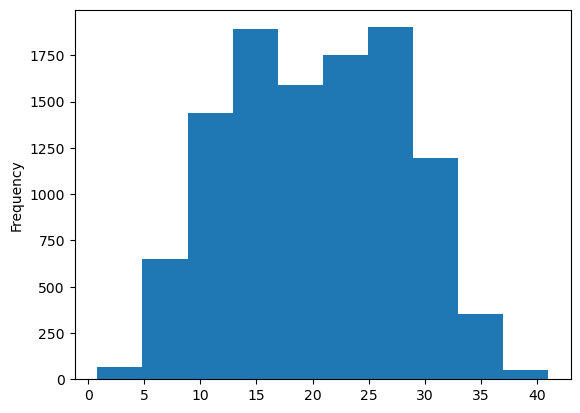

In [87]:
bikes["temp"].plot.hist();

### Lines

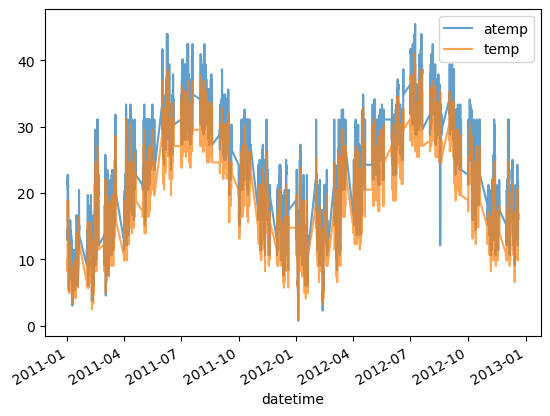

In [88]:
bikes.set_index("datetime").sort_index()[["atemp","temp"]].plot.line(alpha=0.7);

### Boxplots

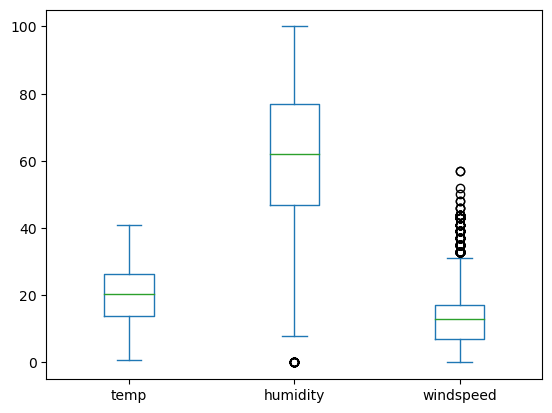

In [89]:
bikes[["temp", "humidity", "windspeed"]].plot.box();

### Conclusion

Pandas is a pretty library with data manipulation routines:
1. Efficient data storage and computations - via NumPy
2. Indexes - database-like
3. Functions for data loading - easier than direct file reading/parsing
4. Functions for statistics - cover most frequently used descriptive statistics
5. Functions for plots - easier than plotting with specialised libraries
6. Flexibility - easy to extend with required data manipulation routines

# Thank you